# Задача
В этой работе вам предлагается решить задачу регрессии, а именно построить алгоритм, определяющий качество вина на основе физико-химических тестов:
 - fixed acidity
 - volatile acidity
 - citric acid
 - residual sugar
 - chlorides
 - free sulfur dioxide
 - total sulfur dioxide
 - density
 - pH
 - sulphates
 - alcohol 
 
Более подробно про признаки можно почитать [здесь](https://archive.ics.uci.edu/ml/datasets/wine+quality). Целевой признак записан в переменной *quality*.

В этой задаче для обучения будут использовать 2 алгоритма:
- [DecisonTree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
- [AdaBoostRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html#sklearn.ensemble.AdaBoostRegressor)

# Решение

Загрузите набор данных *winequality-red.csv* с помощью `pandas` (скачать можно [здесь](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv), или с помощью скрипта ниже). Чтобы лучше понимать, с чем вы работаете/корректно ли вы загрузили данные можно вывести несколько первых строк на экран.

In [73]:
# your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/media/osmilijey/Новый том/MIPT Common/Продвинутые методы МО от ЦК/Комплексная задача/winequality-red.csv', sep=';')
display(data.head())



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Анализ и предобработка данных

Обычно после загрузки датасета всегда необходима его некоторая предобработка. В данном случае она будет заключаться в следующем: 
1. Проверьте есть ли в данных пропущенные значения. Удалите из выборки все объекты с пропусками и дубликаты.
2. Выделите 70% выборки для обучения и дальнейшего анализа.
3. Проанализируйте признаки и по необходимости предобработайте их. Все шаги предобработки поясните текстом.
4. Целевую переменную (ту, которую мы хотим предсказывать) можно выделить в отдельную переменную (НЕ забудьте удалить ее из датасета, когда будете обучать модель).

## Решение
1. Пропусков не обнаружили, а вот дубликаты есть, поэтому подчистим только их
3. Не совсем понял, о какой именно предобработке идет речь в задании. Для того, что бы данные просто были подходящими для модели или что бы модель лучше отработала? 
В общем пойдем по пути наименьшего сопротивления.
    - **Fixed Acidity**
        диапазон достаточно широк, что бы предположить наличие выбросов и задуматься о нормализации или стандартизации
    - **Volatile Acidity**
        тоже как будто есть выбросы
    - **Residual Sugar**
        большое sdt, возможно помогло бы логарифмирование
    - **Chlorides**
        несбалансированное распределение
    - **Free/Total Sulfur Dioxide**
        тоже подозреваю выбросы

Поверхностный анализ данных показал, что: 

1.стоит обратить внимание на выбросы в данных; 

2.не помешало бы нормализовать и стандартизировать данные; 

3.а также сбалансировать распределение

В текущем виде данные у нас уже пригодны для работы заявленных в задании моделей, поэтому просто избавимся от очевидных выбросов и пойдем дальше.
Выбросы детектируем с помощью boxplot
    при построении boxplot-ов, стало очевидно, что как минимум для удобства отображения на одном графике всех признаков, будет хорошо их стандартизировать,
    поэтому **стандартизируем**
    теперь видно, что впотенциальных выбросов в данных много, но так как лично моя экспертиза в винах слишком мала, то удалим только самые ярко выраженные значения
    это значения > 4 и < -3

### **Итог анализа и предобработки:**
- провели стандартизацию признаков (т.к. многие признаки в очевидно разных масштабах)
- построили коробочные графики для каждой фичи, по ним определили пороговые значения, за которыми определяем выбросы
- удалили значения, которые определили выбросами, а также пропуски
    


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


None

False    1359
True      240
Name: count, dtype: int64

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<class 'pandas.core.frame.DataFrame'>
Index: 1290 entries, 0 to 1358
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1290 non-null   float64
 1   volatile acidity      1290 non-null   float64
 2   citric acid           1290 non-null   float64
 3   residual sugar        1290 non-null   float64
 4   chlorides             1290 non-null   float64
 5   free sulfur dioxide   1290 non-null   float64
 6   total sulfur dioxide  1290 non-null   float64
 7   density               1290 non-null   float64
 8   pH                    1290 non-null   float64
 9   sulphates             1290 non-null   float64
 10  alcohol               1290 non-null   float64
 11  quality               1290 non-null   float64
dtypes: float64(12)
memory usage: 131.0 KB


None

(1290, 11)

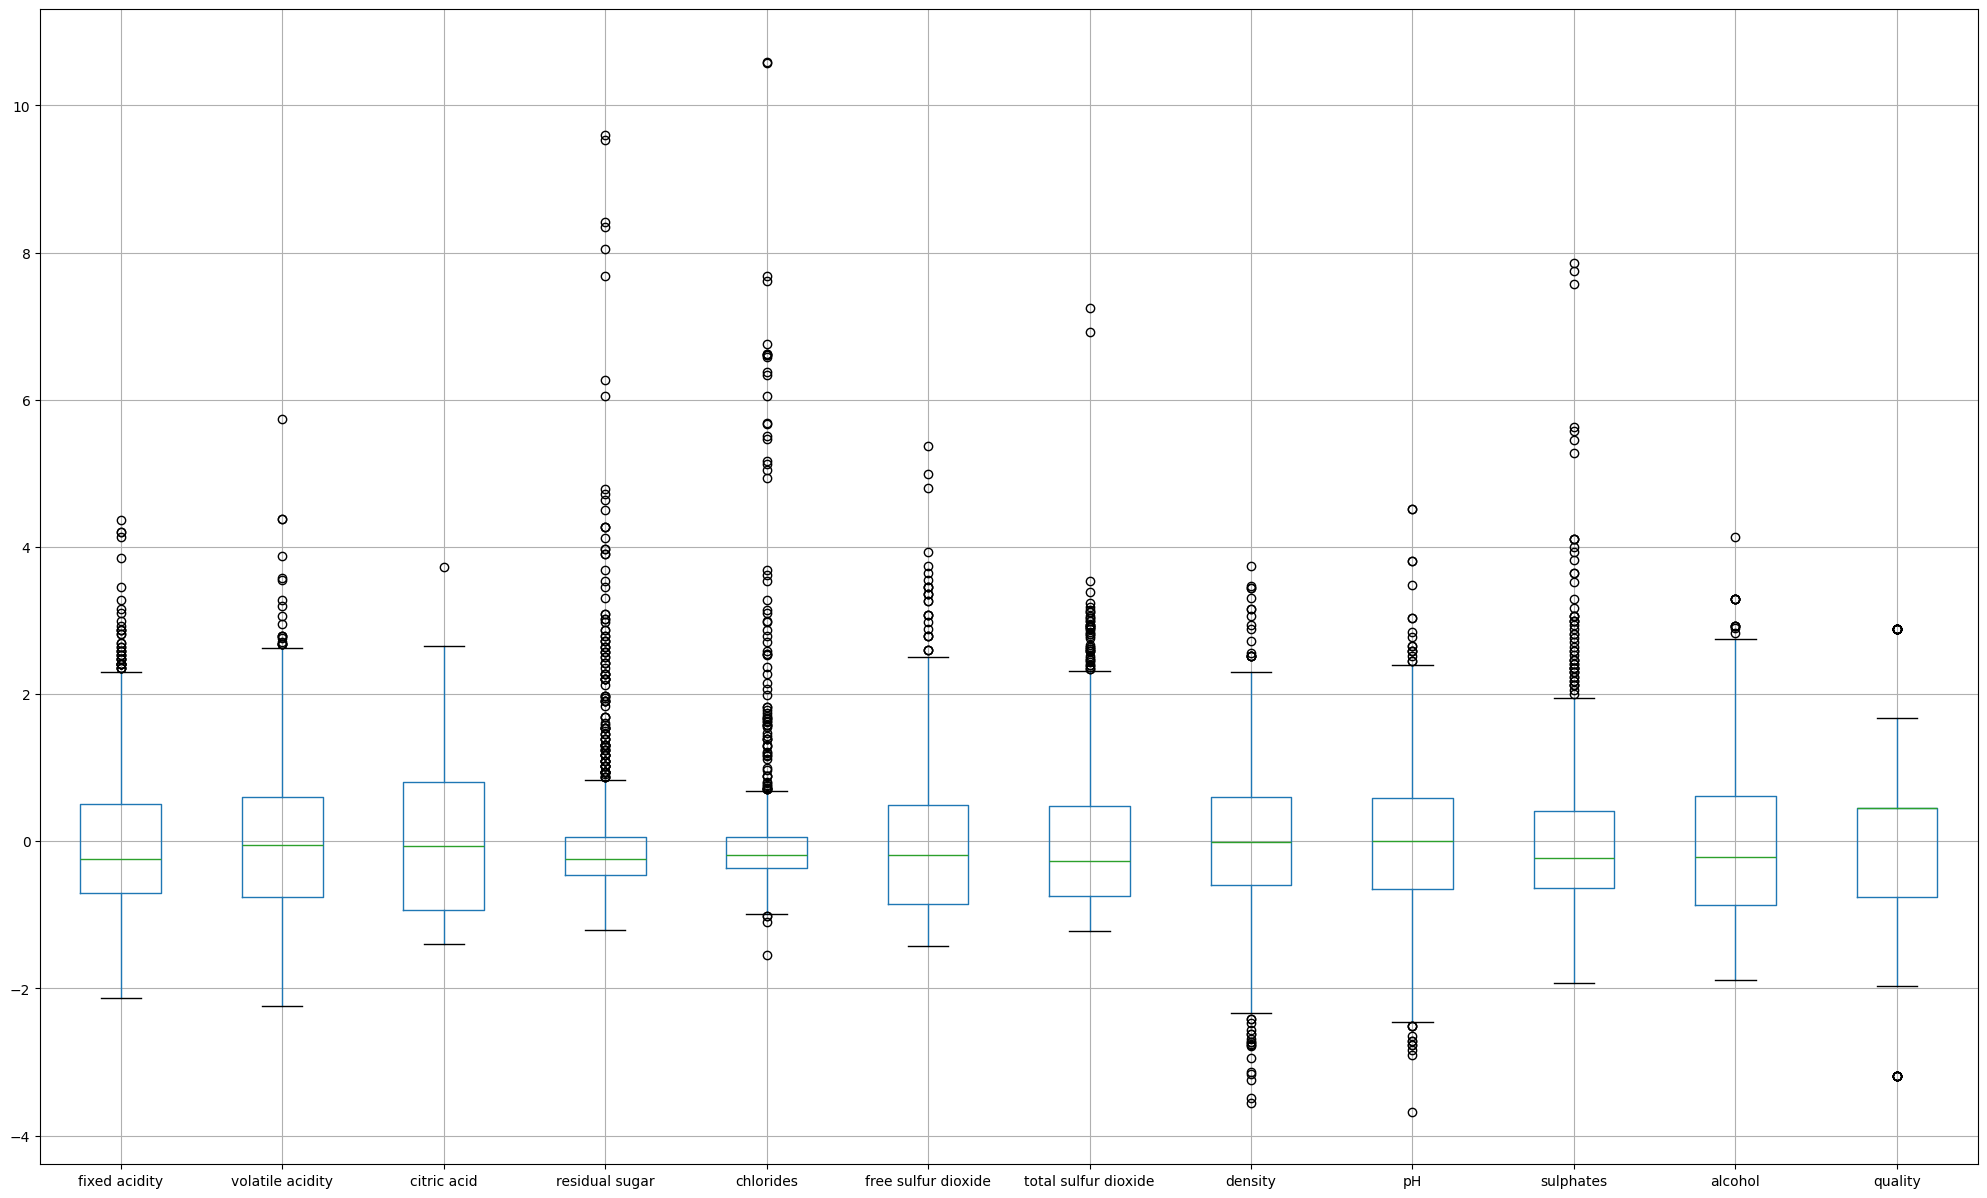

In [74]:
# your code here

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# TODO: 1
# проверим на пропуски и на дубликаты
display(data.info())
display(data.duplicated().value_counts())

# удаляем дубликаты
data = data.drop_duplicates()




# TODO: 3
# проанализируем признаки
display(data.describe())

# стандартизируем данные
scaler = StandardScaler(with_std=True)
scaled_data = scaler.fit_transform(data)

# заранее определим стандартизированные данные в pd DataFrame,
# для удобства
scaled_data = pd.DataFrame(data=scaled_data, columns=data.keys())

# построим коробочные графики для определения выбросов
plt.figure(figsize=(25,15))
scaled_data.boxplot()

# удалим выбросы и пропущенные значения
scaled_data = scaled_data[(scaled_data < 4) & (scaled_data > -3)]
data = scaled_data.dropna()

# посмотрим информацию о предобработанных данных
display(data.info())


# TODO: 2
# разделим датасет на тренировочные и нестовые выборки
X = data.drop(['quality'], axis=1)
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

display(X.shape)





## Обучение модели регрессии

Постройте модель регрессии, используя 2 алгоритма:
- [DecisonTree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
- [AdaBoostRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html#sklearn.ensemble.AdaBoostRegressor)

Для начала используйте гиперпараметры по умолчанию.

Рассчитайте среднее качество кросс-валидации модели как долю дисперсии зависимой переменной (коэффициент детерминации) $R^2$. Каким получилось качество? Какой алгоритм вы бы выбрали для дальнейшей работы? Обоснуйте свой выбор.

## Решение
Для дефолтных значений среднее качество кросс-валидации модели по ${R^2}$ выше у AdaBoostRegressor, поэтому выберу эту модель.

у DecisionTree оценка вообще отрицательная, что может говорить о том, что она не только плохо предсказывает зависимую переменную, но и хуже чем просто среднее значение переменной. Может это из-за переобучения или модель не неаходит полезной структуры данных.

In [75]:
# your code here
from sklearn.model_selection import cross_val_score

# рассчитываем среднее качество кросс валидации на дефолтных параметрах
cv_tree_result = cross_val_score(DecisionTreeRegressor(random_state=42), X_train, y_train, scoring='r2')

cv_adaBoost_result = cross_val_score(AdaBoostRegressor(random_state=42), X_train, y_train, scoring='r2')

print('Кросс-валидация R2 для DecisionTreeRegressor:', np.mean(cv_tree_result))
print('Кросс-валидация R2 для AdaBoostRegressor', np.mean(cv_adaBoost_result))




Кросс-валидация R2 для DecisionTreeRegressor: -0.23974468495885032
Кросс-валидация R2 для AdaBoostRegressor 0.36237456142062274


Теперь сделаем подбор оптимальных гиперпараметров. Сделайте поиск по сетке с помощью кросс-валидации. Изменилось ли качество алгоритмов? Почему?

##  Решение
Качество алгоритмов увеличилось, особенно у DecisionTree, связано это с настройкой гиперпараметров, что собственно очевидно.

In [76]:
# your code here
from sklearn.model_selection import GridSearchCV

# инициализируем сетки параметров
tree_grid = {
    'splitter' : ['best', 'random'],
    'max_depth' : [None, 5,6,7,8,10,11,12,13,14,15,16,17,18,20],
    'min_samples_split' : [2,3,4,5,6,7,8,9,10],
    'max_features' : ['auto', 'sqrt', 'log2']
}

ab_grid = {
    'n_estimators' : [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200],
    'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 1],
    'loss' : ['linear', 'square', 'exponential']
}

# обучаемся
gs_tree = GridSearchCV(DecisionTreeRegressor(random_state=42), tree_grid, scoring='r2')
gs_tree.fit(X_train, y_train)
best_tree_score = gs_tree.best_score_

gs_adaBoost = GridSearchCV(AdaBoostRegressor(random_state=42), ab_grid, scoring='r2')
gs_adaBoost.fit(X_train, y_train)
best_ab_score = gs_adaBoost.best_score_

print('Лучшие параметры для DecisionTreeRegressor:', gs_tree.best_params_)
print('Кросс-валидация R2 для DecisionTreeRegressor после подбора', best_tree_score)

print(f"Лучшие параметры для AdaBoostRegressor:", gs_adaBoost.best_params_)
print(f"Кросс-валидация R2 для AdaBoostRegressor после подбора:", best_ab_score)


/home/osmilijey/anaconda3/envs/HomeWork_env/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1350 fits failed out of a total of 4050.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1350 fits failed with the following error:
Traceback (most recent call last):
  File "/home/osmilijey/anaconda3/envs/HomeWork_env/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/osmilijey/anaconda3/envs/HomeWork_env/lib/python3.13/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File 

Лучшие параметры для DecisionTreeRegressor: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 7, 'splitter': 'best'}
Кросс-валидация R2 для DecisionTreeRegressor после подбора 0.2721471201281595
Лучшие параметры для AdaBoostRegressor: {'learning_rate': 0.09, 'loss': 'square', 'n_estimators': 90}
Кросс-валидация R2 для AdaBoostRegressor после подбора: 0.3825883153817943


Оцените скорость обучения каждого из алгоритмов. Для этого воспользуйтесь графиком вида "ящик с усами", который отражает среднее время обучения алгоритма при фиксированном значении гиперпараметров. Что вы можете сказать о скорости работы алгоритмов? Почему наблюдаются такие результаты? Можно ли ускорить? Если да, то каким образом?


## Решение

Датасет у нас относительно небольшой, поэтому обучение не занимает много времени, однако значительно DecisionTree справляется быстрее.
что касается AdaBoost, то можно его ускорить, путем дополнительного тюна гиперпараметров.

[0.0029742589999841584, 0.0017379230000642565, 0.0018490659999770287, 0.001535062999892034, 0.0014680259998840484, 0.0013505389999863837, 0.001303763999885632, 0.0013286660000630945, 0.0013400979999005358, 0.0013432319999537867]
[0.14492039899982956, 0.14261062900004617, 0.14193858599992382, 0.14182008200009477, 0.14319216600006257, 0.14149814899997182, 0.14216044600016176, 0.14542722800001684, 0.14239576799991482, 0.14182123499995214]


/tmp/ipykernel_18010/2063133880.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([tree_time, adab_time], labels=['Decision Tree', 'AdaBoost'])


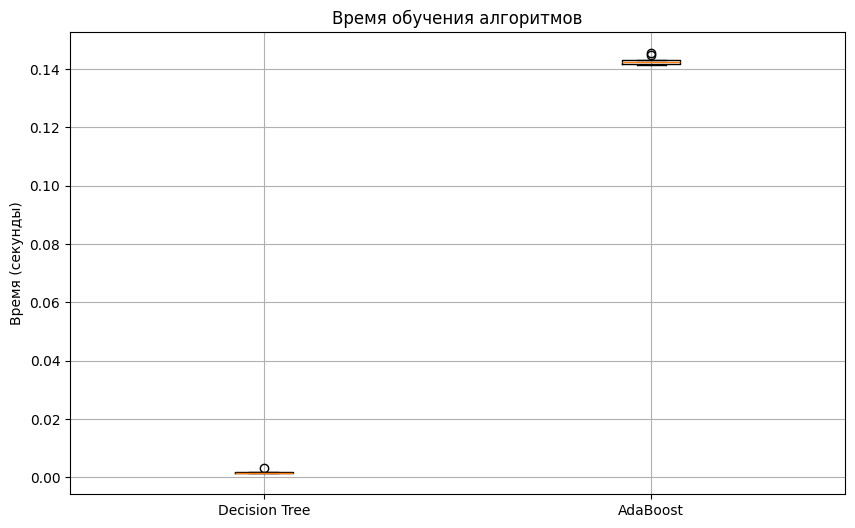

In [77]:
# your code here
from time import process_time 

model_tree = DecisionTreeRegressor(max_depth=5, max_features='sqrt', min_samples_split=7, splitter='best', random_state=42)
model_ab = AdaBoostRegressor(learning_rate=0.09, loss='square', n_estimators=90, random_state=42)

# обучим каждую модель несколько раз и построи графики
tree_time = []
for i in range(10) :
    start = process_time()
    tree_fit = model_tree.fit(X_train, y_train)
    end = process_time()
    tree_time.append(end - start)

adab_time = []
for i in range(10) :
    start = process_time()
    ad_fit = model_ab.fit(X_train, y_train)
    end = process_time()
    adab_time.append(end - start)

print(tree_time)
print(adab_time)

plt.figure(figsize=(10,6))
plt.boxplot([tree_time, adab_time], labels=['Decision Tree', 'AdaBoost'])
plt.title('Время обучения алгоритмов')
plt.ylabel('Время (секунды)')
plt.grid(True)
plt.show()

## PCA преобразование

Теперь попробуем сделать преобразрование данных с помощью PCA. Выберите оптимальное количество компонент и преобразуйте данные. Объясните свой выбор.

## Решение
выберем 5 компонент

построив график видим, что после 5 кумулятивная об. дисперсия достигает примерно 90%, соответственно 5 компонент будет разумным компромиссом между уменьшением размерности и сохранением информации

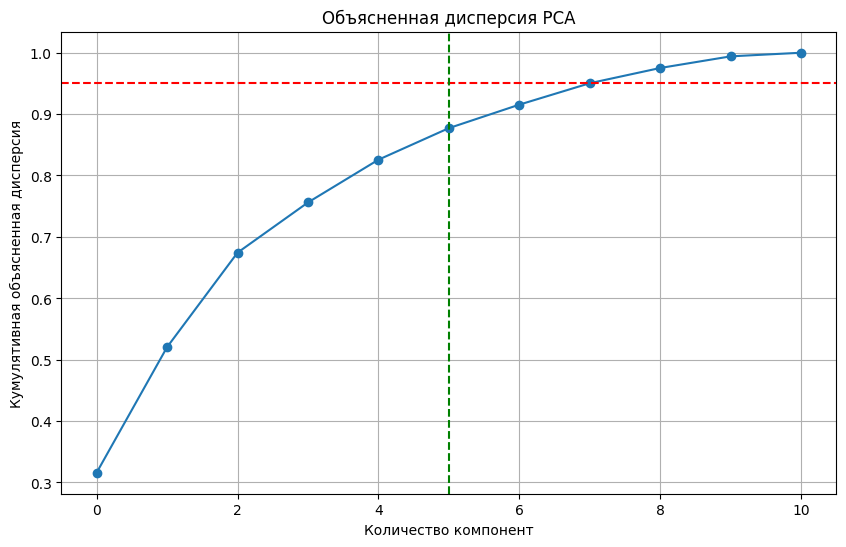

In [78]:
# your code here
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

exp_var = pca.explained_variance_ratio_
cum_var = np.cumsum(exp_var)

plt.figure(figsize=(10, 6))
plt.plot(cum_var, marker='o')
plt.title('Объясненная дисперсия PCA')
plt.xlabel('Количество компонент')
plt.ylabel('Кумулятивная объясненная дисперсия')
plt.grid()
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=5, color='g', linestyle='--')  
plt.show()

n_components = 10
pca_optimal = PCA(n_components=n_components)
X_pca = pca_optimal.fit_transform(X)





## Обучение моделей на данных, трансформированных с помощью PCA

Обучим те же классификаторы на трансформированных с помощью PCA данных. Подберите оптимальные значения исследуемых гиперпараметров для новых данных. Какой алгоритм справился лучше? Какой быстрее? Почему?

## Решение
обучим классификаторы)))

In [79]:
# your code here

from time import process_time 
from sklearn.metrics import r2_score

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, train_size=0.7, random_state=42)

tree_grid = {
    'splitter' : ['best', 'random'],
    'max_depth' : [None, 5,6,7,8,10,11,12,13,14,15,16,17,18,20],
    'min_samples_split' : [2,3,4,5,6,7,8,9,10],
    'max_features' : ['auto', 'sqrt', 'log2']
}

adab_grid = {
    'n_estimators' : [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200],
    'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 1],
    'loss' : ['linear', 'square', 'exponential']
}

tree_search_pca = GridSearchCV(DecisionTreeRegressor(random_state=42), tree_grid, cv=5, scoring='r2')
adab_search_pca = GridSearchCV(AdaBoostRegressor(random_state=42), adab_grid, cv=5, scoring='r2')


start_time = process_time()
tree_search_pca.fit(X_train_pca, y_train_pca)
tree_time_pca = process_time() - start_time

start_time = process_time()
adab_search_pca.fit(X_train_pca, y_train_pca)
adab_time_pca = process_time() - start_time


print(f"для Decision Tree R^2: {tree_search_pca.best_score_:.4f}")
print(f"Время обучения Decision Tree: {tree_time_pca:.4f} секунд")
print()
print(f"для AdaBoost R^2: {adab_search_pca.best_score_:.4f}")
print(f"Время обучения AdaBoost: {adab_time_pca:.4f} секунд")


/home/osmilijey/anaconda3/envs/HomeWork_env/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1350 fits failed out of a total of 4050.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1350 fits failed with the following error:
Traceback (most recent call last):
  File "/home/osmilijey/anaconda3/envs/HomeWork_env/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/osmilijey/anaconda3/envs/HomeWork_env/lib/python3.13/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File 

для Decision Tree R^2: 0.1689
Время обучения Decision Tree: 7.3412 секунд

для AdaBoost R^2: 0.3188
Время обучения AdaBoost: 238.4461 секунд


## Сравнение результатов

Сравните результаты полученные до трансформации данных с помощью PCA и после. Для этого воспользуйтесь "ящиком с усами" (boxplot).

Сделайте общие итоговые выводы о моделях регрессии с точки зрения их работы с признаками и сложности самой модели (какие гиперпараметры есть у модели, сильно ли изменение значения гиперпараметра влияет на качество модели).

## Решение
После PCA ${R^2}$ стала хуже, наверно потому что PCA уменьшает размерность и не гарантирует сохранение всех взаимосвязей между признаками для предсказания таргета. Возможно часть нужной информации потерялось, к тому же модели на основе деревьев чувствительны к потерям информации

**DecisionTree** показал более значительное снижение результатов. Это подтверждает гипотезу о том, что деревья решений нуждаются в более выраженной структуре данных для точного прогнозирования.

**AdaBoost** также ухудшился, но в меньшей степени. Это может указывать на то, что AdaBoost лучше справляется с потерей информации, поскольку использует несколько базовых моделей.

изменение значения гиперпараметров сильно влияет на качество модели

Возможно ситуацию улучшило бы: 
- оставить больше компонент, что юбы сохранить больше вариаций данных
- использовать другие методы снижения размерности t-SNE или UMAP
- более углубиться в значения при кросс валидации

In [80]:
# your code here
print('ДО PCA')
print(f"Decision Tree R^2: {best_tree_score:.4f}")
print(f"для AdaBoost R^2: {best_ab_score:.4f}")

print('===================================================')

print('ПОСЛЕ PCA')
print(f"Decision Tree R^2: {tree_search_pca.best_score_:.4f}")
print(f"для AdaBoost R^2: {adab_search_pca.best_score_:.4f}")

ДО PCA
Decision Tree R^2: 0.2721
для AdaBoost R^2: 0.3826
ПОСЛЕ PCA
Decision Tree R^2: 0.1689
для AdaBoost R^2: 0.3188


## Тестирование всех модели

Протестируйте все построенные модели (в т.ч. с и без PCA трансформации) на данных, которые были отложены для теста (их должно было остаться 30%). Не забудьте про все необходимые преобразования.

In [82]:
# your code here
from sklearn.metrics import mean_absolute_percentage_error

print('Decision Tree c PCA', mean_absolute_percentage_error(tree_search_pca.predict(X_test_pca), y_test_pca))
print('Decision Tree без PCA', mean_absolute_percentage_error(gs_tree.predict(X_test), y_test))


print('adaBoost с PCA', mean_absolute_percentage_error(adab_search_pca.predict(X_test_pca), y_test_pca))
print('adaBoost без PCA', mean_absolute_percentage_error(gs_adaBoost.predict(X_test), y_test))

Decision Tree c PCA 7.6132699467501315
Decision Tree без PCA 5.551893112563192
adaBoost с PCA 9.109739246003716
adaBoost без PCA 20.858908319650606
